# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Coursework 3<a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Coursework" data-toc-modified-id="Coursework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Coursework</a></span><ul class="toc-item"><li><span><a href="#Coursework-3A---Steady-state-advection-diffusion-with-the-FEM" data-toc-modified-id="Coursework-3A---Steady-state-advection-diffusion-with-the-FEM-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Coursework 3A - Steady-state advection-diffusion with the FEM</a></span></li><li><span><a href="#Coursework-3B---Time-dependent-advection-diffusion-with-the-FEM" data-toc-modified-id="Coursework-3B---Time-dependent-advection-diffusion-with-the-FEM-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Coursework 3B - Time-dependent advection-diffusion with the FEM</a></span></li><li><span><a href="#Coursework-3C---2D-mesh-optimisation" data-toc-modified-id="Coursework-3C---2D-mesh-optimisation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Coursework 3C - 2D mesh optimisation</a></span></li></ul></li></ul></div>

# Coursework 3A - Steady-state advection-diffusion with the FEM

We want to solve the steady-state advection diffusion problem, with Dirichlet boundary conditions, using the finite element mothod.
The problem is defined by the equation:

<br>
$$\frac{\partial {c}}{\partial {x}} = \frac{1}{Pe}\frac{\partial^2 {c}}{\partial {x}^2},$$
<br>

with $Pe$ (Peclet number) defined as:

<br>
$$Pe = \frac{UL}{\kappa},$$
<br>

where $U$ is advection speed, $\kappa$ is diffusivity and $L$ is the length of the domain.
The problem can be written as:

<br>
$$u'\,-\,(1/Pe)\,u'' = f.$$
<br>

The problem has the exact solution given by:

<br>
$$ u(x) = ur\frac{\exp\left(Pe \frac{x}{L}\right) - 1}{\exp(Pe) - 1}, $$
<br>

where $ur$ is the right boundary condition (left boundary condition is $u(0)=0$).
We want to solve the problem considering $Pe = 10$, $L=1$ and the following left ($ul$) and right ($ur$) boundary conditions:

<br>
$$ul = u(0) = 0,\,\,\,\,\,ur = u(L) = 1$$
<br>


## Discretisation of the diffusion term

Following the approach described in Lecture 11, we start by discretising the second derivative appearing in the diffusion term. Considering it in isolation (we will later discretise the advection term) we can write:

<br>
$$-u'' = f_{diff}.$$
<br>

In the finite element method we approximate the solution function as:

<br>
$$u \approx u_h := \sum_{j=0}^n u_j \phi_j(x),$$
<br>

with $\phi_j\,\,(j = 0, 1..., n)$ representing the basis functions, which we choose to be linear (hat functions). Substituting the approximate solution into the variational form of the problem we get:

<br>
$$\int_I \,-u_h''\,\phi_i\,dx = \int_I \,f_{diff}\,\phi_i\,dx, \;\;\;\;\text{for}\;\;\;\; i=0,\ldots,n.$$
<br>

Performing integration by parts we have:

<br>
$$\int_0^1 u_h'\,\phi_i' \,dx = \int_0^1 f_{diff}\,\phi_i \,dx, \;\;\;\;\; \text{for}\;\;\;\; i=0, 1,\ldots, n. $$
<br>

We can now plug into the LHS of the last equation the RHS of the solution approximation defined above:

<br>
\begin{align*}
\int_0^1 \left(\sum_{j=0}^{n} u_j\,\phi_j'\right)\phi_i' \,dx = \sum_{j=0}^{n} u_j\, \int_0^1 \phi_j'\, \phi_i' \,dx,
\end{align*}
<br>

where the integral of the product of the basis functions derivatives represents the stiffness matrix:

<br>
$$ K_{ij} = \int_0^1 \phi_j'\, \phi_i' \,dx, \;\;\;\;\; \text{for}\;\;\;\; i, \, j=0, 1,\ldots, n.$$
<br>


## Discretisation of the advection term

We now need to discretise the first derivative in the advection term. As done for the second derivative, we treat the first derivative in isolation and write the variational form of the problem has:

<br>
$$-\int_0^1 u_h'\,\phi_i \,dx = \int_0^1 f_{adv}\,\phi_i \,dx, \;\;\;\;\; \text{for}\;\;\;\; i=0, 1,\ldots, n. $$
<br>

The minus sign in front of the LHS integral is necessary in order to account for the fact that the advection term appears in the problem equation with a plus sign. The diffusion term has instead a minus sign. Focusing on the LHS of the above equation we plug into it the RHS of the equation defining the approximate solution to get:

<br>
\begin{align*}
-\int_0^1 \left(\sum_{j=0}^{n} u_j\,\phi_j'\right)\phi_i \,dx = -\sum_{j=0}^{n} u_j\, \int_0^1 \phi_j'\, \phi_i \,dx,
\end{align*}
<br>

It is now possible to introduce the discretisation matrix for the first derivative, indicated as $KAdv$, in order to distinguish it from the discretisatoin matrix previously introduced and to highlight the fact that it refers to the discretisation of the advection term.

<br>
$$ KAdv_{ij} = \int_0^1 \phi_j'\, \phi_i \,dx, \;\;\;\;\; \text{for}\;\;\;\; i, \, j=0, 1,\ldots, n.$$
<br>


## Discretised form of the full problem

The discretised version of the weak form of the full (advection + diffusion) problem is:


<br>
\begin{align*}
- \sum_{j=0}^{n} u_j\, \int_0^1 \phi_j'\, \phi_i \,dx \, + \, \frac{1}{Pe} \, \sum_{j=0}^{n} u_j\, \int_0^1 \phi_j'\, \phi_i' \,dx \, = \int_0^1 f\,\phi_i \,dx, \;\;\; \text{for}\;\; i=0, 1, \ldots, n
\end{align*}
<br>

<br>
$$ \iff - \sum_{j=0}^{n} u_j\, KAdv_{ij} \, + \, \frac{1}{Pe} \, \sum_{j=0}^{n} u_j\, K_{ij} \, = b_i, \;\;\; \text{for}\;\; i=0, 1, \ldots, n $$
<br>

<br>
$$ \iff (- \, KAdv \, + \, \frac{1}{Pe} \, K) \, \boldsymbol{u} \, = \, \boldsymbol{b}. $$
<br>


## Implementation
The description of how to obtain the entries of the diffusion term discretisation matrix ($K$) has been done in Lecture 11. Here we define how to obtain the terms of the discretisation matrix of the advection term ($KAdv$).
We start with the basis functions (and their derivatives) we choose to use:

<br>
$$
\phi_i(x) = 
\begin{cases}
\frac{x - x_{i-1}}{\Delta x_{i-1}}, &\text{if}\;\;\; x\in e_{i-1}\equiv[x_{i-1},x_{i}] \\[5pt]
\frac{x_{i+1} - x}{\Delta x_{i}}, &\text{if}\;\;\; x\in e_{i}\equiv[x_{i},x_{i+1}] \\[5pt]
0, & \text{otherwise} \\
\end{cases}
$$
<br>

<br>
$$
\phi'_i(x) = 
\begin{cases}
\frac{1}{\Delta x_{i-1}}, &\text{if}\;\;\; x\in e_{i-1}\equiv[x_{i-1},x_{i}] \\[5pt]
\frac{-1}{\Delta x_{i}}, &\text{if}\;\;\; x\in e_{i}\equiv[x_{i},x_{i+1}] \\[5pt]
0, & \text{otherwise} \\
\end{cases}
$$
<br>

The entries of $KAdv$ for an internal row $i$ can be computed as:

<br>
\begin{align*}
KAdv_{ii} 
&= \int_0^1 \phi_i'\, \phi_i \,dx 
\\[10pt]
&= 
\int_{x_{i-1}}^{x_i} \phi_i'\, \phi_i \,dx + \int_{x_{i}}^{x_{i+1}} \phi_i'\, \phi_i \,dx
\\[10pt]
&= \int_{x_{i-1}}^{x_i} \frac{1}{\Delta x_{i-1}}\, \frac{x-x_{i-1}}{\Delta x_{i-1}} \,dx + \int_{x_{i}}^{x_{i+1}} \frac{-1}{\Delta x_{i}}\, \frac{x_{i+1}-x}{\Delta x_{i}} \,dx
\\[10pt]
&= \int_{x_{i-1}}^{x_i} \frac{x-x_{i-1}}{\Delta x_{i-1}^2} \,dx + \int_{x_{i}}^{x_{i+1}} \frac{-x_{i+1}+x}{\Delta x_{i}^2} \,dx
\\[10pt]
&= \frac{\frac{x_i^2}{2} - x_{i}x_{i-1} + \frac{x_{i-1}^2}{2}}{\Delta x_{i-1}^2} + \frac{-\frac{x_{i+1}^2}{2} + x_{i}x_{i+1} - \frac{x_{i}^2}{2}}{\Delta x_{i}^2},
\end{align*}
<br>

<br>
\begin{align*}
KAdv_{i,i-1} 
&= \int_0^1 \phi_i'\, \phi_{i-1} \,dx 
\\[10pt]
&= 
\int_{x_{i-1}}^{x_i} \phi_i'\, \phi_{i-1} \,dx 
\\[10pt]
&= \int_{x_{i-1}}^{x_i} \frac{1}{\Delta x_{i-1}}\, \frac{x_i-x}{\Delta x_{i-1}} \,dx 
\\[10pt]
&= \int_{x_{i-1}}^{x_i} \frac{x_i-x}{\Delta x_{i-1}^2} \,dx 
\\[10pt]
&= \frac{\frac{x_i^2}{2} -x_i x_{i-1} + \frac{x_{i-1}^2}{2}}{\Delta x_{i-1}^2},
\end{align*}
<br>

<br>
\begin{align*}
KAdv_{i,i+1} 
&= \int_0^1 \phi_i'\, \phi_{i+1} \,dx 
\\[10pt]
&= 
\int_{x_{i}}^{x_{i+1}} \phi_i'\, \phi_{i+1} \,dx 
\\[10pt]
&= \int_{x_{i}}^{x_{i+1}} \frac{-1}{\Delta x_{i}}\, \frac{x-x_i}{\Delta x_{i}} \,dx 
\\[10pt]
&= \int_{x_{i}}^{x_{i+1}} - \frac{x-x_i}{\Delta x_{i}^2} \,dx 
\\[10pt]
&= \frac{- \frac{x_{i+1}^2}{2} +x_{i+1} x_i - \frac{x_i^2}{2}}{\Delta x_{i}^2},
\end{align*}
<br>

The cases for $i = 0$: 

<br>
\begin{align*}
K_{0,0} 
&= \int_0^1 \phi_0'\, \phi_0 \,dx 
\\[10pt]
&= 
\int_{x_{0}}^{x_1} \phi_0'\, \phi_0 \,dx \\[10pt]
&= \int_{x_{0}}^{x_1} \frac{-1}{\Delta x_{0}}\, \frac{x_1-x}{\Delta x_{0}} \,dx 
\\[10pt]
&= \int_{x_{0}}^{x_1} \frac{-x_1 + x}{\Delta x_{0}^2} \,dx \\[10pt]
&= \frac{ -\frac{x_1^2}{2} + x_1 x_0 -\frac{x_0^2}{2}  }{\Delta x_{0}^2},
\end{align*}
<br>

<br>
\begin{align*}
KAdv_{0,1} 
&= \int_0^1 \phi_0'\, \phi_{1} \,dx 
\\[10pt]
&= 
\int_{x_{0}}^{x_{1}} \phi_0'\, \phi_{1} \,dx 
\\[10pt]
&= \int_{x_{0}}^{x_{1}} \frac{-1}{\Delta x_{0}}\, \frac{x-x_0}{\Delta x_{0}} \,dx 
\\[10pt]
&= \int_{x_{0}}^{x_{1}} - \frac{x-x_0}{\Delta x_{0}^2} \,dx 
\\[10pt]
&= \frac{- \frac{x_{1}^2}{2} +x_{1} x_0 - \frac{x_0^2}{2}}{\Delta x_{0}^2},
\end{align*}
<br>

<br>
$$ KAdv_{1,0} = -KAdv_{0,1} $$
<br>

With a similar procedure it is possible to obtain the entries with $i = n$, for example:


<br>
\begin{align*}
KAdv_{n,n} 
&= \int_0^1 \phi_{n}'\, \phi_{n} \, dx
\\[10pt]
&= 
\int_{n-1}^{n} \phi_n'\, \phi_{n} \,dx 
\\[10pt]
&= \int_{n-1}^{n} \frac{1}{\Delta x_{n-1}}\, \frac{x-x_{n-1}}{\Delta x_{n-1}} \,dx 
\\[10pt]
&= \int_{n-1}^{n} \frac{x-x_{n-1}}{\Delta x_{n-1}^2} \,dx 
\\[10pt]
&= \frac{ \frac{x_{n}^2}{2} - x_{n} x_{n-1} + \frac{x_{n-1}^2}{2}}{\Delta x_{n-1}^2}.
\end{align*}
<br>


## Dealing with Dirichlet boundary conditions
Since we have imposed boundary conditions, we actually know the leftmost and the rightmost $u_j$ coefficients ($u_0$ and $u_n$). The discretised form of the problem can therefore be written as:

<br>
\begin{align*}
- \sum_{j=0}^{n} u_j\, \int_0^1 \phi_j'\, \phi_i \,dx \, + \, \frac{1}{Pe} \, \sum_{j=0}^{n} u_j\, \int_0^1 \phi_j'\, \phi_i' \,dx \, = \int_0^1 f\,\phi_i \,dx, \;\;\; \text{for}\;\; i=0, 1, \ldots, n
\end{align*}
<br>

<br>
\begin{align*}
- \sum_{j=1}^{n-1} u_j \, \int_0^1 \phi_j' \, \phi_i \,dx \, -u_0 \, \int_0^1 \phi_j' \, \phi_i \, dx \, -u_n \, \int_0^1 \phi_j' \, \phi_i \, dx \,   +   \, \frac{1}{Pe} \, \sum_{j=1}^{n-1} u_j \, \int_0^1 \phi_j' \, \phi_i' \, dx \, + \frac{1}{Pe} \, u_0 \, \int_0^1 \phi_j' \, \phi_i' \, dx \, + \frac{1}{Pe} \, u_n \, \int_0^1 \phi_j' \, \phi_i' \, dx \, = \int_0^1 f \, \phi_i \, dx, \;\;\; \text{for}\;\; i = 1, 2, \ldots, n-1.
\end{align*}
<br>

The boundary terms will be moved to the RHS when implementing the code.

## Code implementation of the numerical solver

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si
import scipy.linalg as sl
import scipy.sparse as sp
import scipy.sparse.linalg as spla
from pprint import pprint

## Implement basis functions

In [28]:
def hat_function(i, x_nodes):
    """ 
    Linear continuous basis function at node i.
    Returns a function for later use in quadrature rules.
    
    Parameters
    ----------
    i : integer
        Index of the node.
    x_nodes : array
        Space coordinates of the nodes.
    
    Returns
    -------
    Hat function at node i.
    """
    
    assert(i>=0 and i<=len(x_nodes)-1)
    dx = np.diff(x_nodes)
    if i==0:
        hat = lambda x: np.select([ x<=x_nodes[i+1] ], [ (x_nodes[i+1] - x)/dx[i] ] ,0.0)
    elif i==len(x_nodes)-1:
        hat = lambda x: np.select([ x>=x_nodes[i-1] ], [ (x - x_nodes[i-1])/dx[i-1] ] ,0.0)
    else:
        hat = lambda x: np.select(
                [ np.all([[x>=x_nodes[i-1]],[x<=x_nodes[i]]], axis=0)[0],  
                  np.all([[x>=x_nodes[i]],[x<=x_nodes[i+1]]], axis=0)[0]] ,
                [ (x-x_nodes[i-1])/dx[i-1], (x_nodes[i+1]-x)/dx[i] ] ,0.0)
    
    return hat

## Implement the Simpson's rule

In [29]:
def simpsons_rule(a, b, function, number_intervals=10):
    """ 
    Function to evaluate Simpson's rule.
    
    Parameters
    ----------
    a : float
        Space coordinate of the left border.
    b : float
        Space coordinate of the right border.
    function : function
        Is the function of interest.
    number_intervals : integer
        Number of intervals the domain of integration is diveded into (default = 10).
    
    Returns
    -------
    I_S : float
        Result of the numerical integration.
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    # Loop to evaluate Simpson's formula over each interval 
    for i in range(number_intervals):
        # find a, c, and b
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size/2
        this_bin_end = this_bin_start + interval_size
        # calculate the rule and add to running total
        I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))

    return I_S

## Numerical solver

In [30]:
# analytical solution
def u_exact(x):
    """ 
    Define the analytical solution of the problem.
    
    Parameters
    ----------
    x : float
        Space coordinate.
    
    Returns
    -------
    Value of the analytical solution in x.
    """
    return (np.exp(Pe*x)-1) / (np.exp(Pe)-1)


# function of the problem
def f(x):
    """ 
    Define the problem function.
    
    Parameters
    ----------
    x : float
        Space coordinate.
    
    Returns
    -------
    Problem function.
    """
    
    # u' - (1/Pe)u''
    u_p = (Pe*np.exp(Pe*x)) / (np.exp(Pe)-1)
    u_pp = (Pe**2*np.exp(Pe*x)) / (np.exp(Pe)-1)
    f_x = u_p - (1/Pe)*u_pp
    
    return f_x

error (RMS) =  0.0013165651690228482


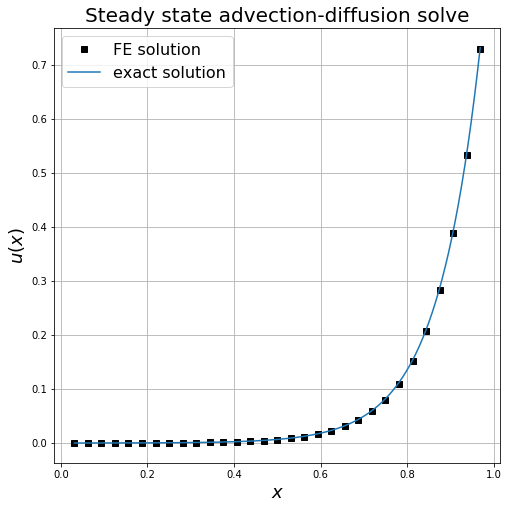

In [31]:
# set parameters
uL = 0.
uR = 1.
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1

N_elements_CG = 32
N_nodes_CG = N_elements_CG + 1

x_nodes = np.linspace(0, 1 , N_nodes_CG )
dx = np.diff(x_nodes)

K = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
K_adv = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
RHS = np.zeros(N_nodes_CG - 2)


# construct discretisation matrix for advection term
K_adv = np.diag( (x_nodes[1:-1]**2/2. - x_nodes[1:-1]*x_nodes[0:-2] + x_nodes[0:-2]**2/2.) / dx[0:-1]**2 \
         + (-x_nodes[2:]**2/2. + x_nodes[1:-1]*x_nodes[2:] - x_nodes[1:-1]**2/2.) / dx[1:]**2 , k=0) \
      + np.diag( (x_nodes[2:-1]**2/2. - x_nodes[2:-1]*x_nodes[1:-2] + x_nodes[1:-2]**2/2.) / dx[1:-1]**2 , k=-1) \
      + np.diag( (-x_nodes[2:-1]**2/2. + x_nodes[2:-1]*x_nodes[1:-2] - x_nodes[1:-2]**2/2.) / dx[1:-1]**2 , k= 1)


# construct discretisation matrix for second deriv
K = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
    - np.diag(1. / dx[1:-1]   , k=-1) \
    - np.diag(1. / dx[1:-1]   , k=1)


# form RHS vector by integrating function f multiplied by basis function
for node in range(1, N_nodes_CG - 1):
    phi_i = hat_function(node, x_nodes)
    integrand = lambda x : f(x) * phi_i(x)
    RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2)


# add in the extra entries due to the inhomogeneous Dirichlet BC
# left boundary is homogeneous, u(0) = 0, the product result is zero
RHS[-1] = RHS[-1] - (1/Pe)*(uR * (-1/dx[-1]) * (1/dx[-1]))*dx[-1] \
                  + uR * (-x_nodes[-1]**2/2. + x_nodes[-1]*x_nodes[-2] - x_nodes[-2]**2/2.) / dx[-2]**2


Disc = (1/Pe)*K - K_adv
u = sl.solve(Disc, RHS)


print('error (RMS) = ', 
      sl.norm(u - u_exact(x_nodes[1:-1]) )
      /np.sqrt(len(u)) )


# plot
fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize = 18)
ax1.set_ylabel('$u(x)$', fontsize = 18)
ax1.set_title('Steady state advection-diffusion solve', fontsize = 20)
ax1.plot(x_nodes[1:-1], u, 'ks', label = 'FE solution')
x_fine = np.linspace(x_nodes[1],x_nodes[-2],1000)
ax1.plot(x_fine, u_exact(x_fine), label = 'exact solution')
ax1.legend(loc = 'best', fontsize = 16)
plt.grid(True)
plt.show()


## Convergence analysis

In [32]:
# Function to reconstruct the piecewise linear function.
def pwlinear(x_nodes, y_nodes, x):
    """
    Function to return a piecewise linear approximation at locations given in x.
    
    Parameters
    ----------
    x_nodes : array
        Locations of the nodes where the top hat functions are located.
    y_nodes : array
        Values of the function to be approximated in correspondence of the x_nodes values.
    x : array
       Space coordinates where the piecewise linear function is evaluated.
    
    Returns
    -------
    val : array
        Values of the piecewise linear function.
    """

    val = np.zeros_like(x)

    for i in range(len(x)):
        # which mesh node is directly to the left of x[i] ?
        node = np.where( x[i] >= x_nodes )[0][-1]
        # because of the greather than or equals above, deal with problem of hitting last node
        node = np.minimum(len(x_nodes)-2,node)
        # add together the contributions from the two hat functions at this x location
        phi_node = hat_function(node, x_nodes)
        phi_node_plus_1 = hat_function(node+1, x_nodes)
        val[i] = y_nodes[node]*phi_node(x[i]) + y_nodes[node+1]*phi_node_plus_1(x[i])
        
    return val

In [33]:
# set parameters
n_ite = 8
N_elements = [30]

for i in range(1, n_ite):
    N_elements.append(N_elements[i-1]*2)

err_all = []
err2_all = []
dx_all = []

for n_ele in range(len(N_elements)):
    
    N_elements_CG = N_elements[n_ele]
    N_nodes_CG = N_elements_CG + 1

    x_nodes = np.linspace(0, 1 , N_nodes_CG )
    dx = np.diff(x_nodes)

    K = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
    K_adv = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
    RHS = np.zeros(N_nodes_CG - 2)

    # construct discretisation matrix for advection term
    K_adv = np.diag( (x_nodes[1:-1]**2/2. - x_nodes[1:-1]*x_nodes[0:-2] + x_nodes[0:-2]**2/2.) / dx[0:-1]**2 \
                   + (-x_nodes[2:]**2/2. + x_nodes[1:-1]*x_nodes[2:] - x_nodes[1:-1]**2/2.) / dx[1:]**2 , k=0) \
          + np.diag( (x_nodes[2:-1]**2/2. - x_nodes[2:-1]*x_nodes[1:-2] + x_nodes[1:-2]**2/2.) / dx[1:-1]**2 , k=-1) \
          + np.diag( (-x_nodes[2:-1]**2/2. + x_nodes[2:-1]*x_nodes[1:-2] - x_nodes[1:-2]**2/2.) / dx[1:-1]**2 , k= 1)

    # construct discretisation matrix for second deriv
    K = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
      - np.diag(1. / dx[1:-1]   , k=-1) \
      - np.diag(1. / dx[1:-1]   , k=1)

    # form RHS vector by integrating function f multiplied by basis function
    for node in range(1, N_nodes_CG - 1):
        phi_i = hat_function(node, x_nodes)
        integrand = lambda x : f(x) * phi_i(x)
        RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2 )

    # Add in the extra entries due to the inhomogeneous Dirichlet BC.
    # I should work also on the left boundary, but the condition is homogeneous,
    # u(0) = 0, so the product will be zero.
    RHS[-1] = RHS[-1] - (1/Pe)*(uR * (-1/dx[-1]) * (1/dx[-1]))*dx[-1] \
                      + uR * (-x_nodes[-1]**2/2. + x_nodes[-1]*x_nodes[-2] - x_nodes[-2]**2/2.) / dx[-2]**2

    Disc = (1/Pe)*K - K_adv
    u = sl.solve(Disc, RHS)

    # RMS of the nodal errors
    err = sl.norm(u - u_exact(x_nodes[1:-1]) ) / np.sqrt(len(u))
    err_all.append(err)
    
    # errors on a fine mesh to approximate L2 norm
    x_fine = np.linspace(x_nodes[1],x_nodes[-2],20000)
    err = sl.norm(pwlinear(x_nodes[1:-1], u, x_fine) - u_exact(x_fine)) \
                        / np.sqrt(len(x_fine))
    err2_all.append(err)
    
    dx_all.append(dx[0])


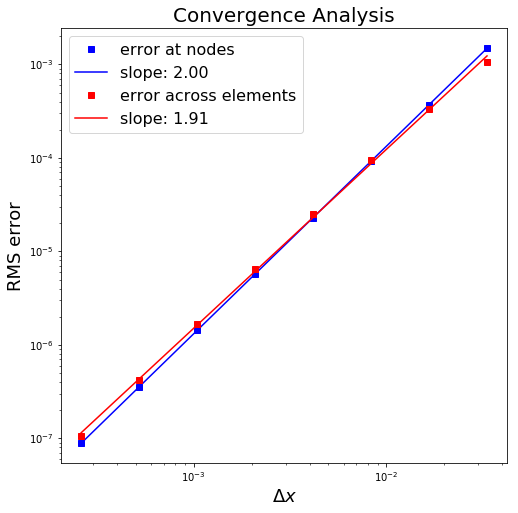

In [34]:
fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta x$', fontsize = 18)
ax1.set_ylabel('RMS error', fontsize = 18)
ax1.set_title('Convergence Analysis', fontsize = 20)

ax1.loglog(dx_all, err_all, 'bs', label = 'error at nodes')
fit = np.polyfit(np.log(dx_all), np.log(err_all), 1)
ax1.loglog(dx_all, np.exp(fit[1]) * dx_all**(fit[0]), 'b-', label = 'slope: {:.2f}'.format(fit[0]))

ax1.loglog(dx_all, err2_all, 'rs', label = 'error across elements')
fit = np.polyfit(np.log(dx_all), np.log(err2_all), 1)
ax1.loglog(dx_all, np.exp(fit[1]) * dx_all**(fit[0]), 'r-', label = 'slope: {:.2f}'.format(fit[0]))

ax1.legend(loc = 'best', fontsize = 16)
plt.show()

## Comments on the figure
In lecture 11, when solving the steady-state diffusion problem, we observed a 4th order convergence in terms of the nodal values. Here instead we achieve second order accuracy. The difference in accuracy might be due to the fact that here we perform an additional discretisation, the one relative to the advective term. This introduces a further source of error that has apparently has a dominant effect in determining the order of accuracy.<br>
In both problems, steady-stade diffusion and steady state advection-diffusion, we have second order accuracy across the elements (approximation of the L2 norm).<br>

## Implement a finite difference solver

In [35]:
def BVP_AD_central(L, U, kappa, CE, N):
    """ 
    Function to assemble and solve the AD BVP problem
    using central differences for both adv and diff.
    
    Parameters
    ----------
    L : float
        Length of the domain.
    U : float
        Advection speed.
    kappa : float
        Diffusivity.
    CE : float
        Right side boundary condition.
    N : integer
        Number of nodes.
    
    Returns
    -------
    x : array
        Space coordinates of the nodes.
    C : array
        Values of the solution in x.
    """

    dx = L / N
    x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
    A = np.zeros((N + 2, N + 2))
    b = np.zeros((N + 2))
    # interior points
    r_diff = kappa / dx**2
    r_adv = 0.5 * U / dx
    for i in range(1, N + 1):
        A[i, i - 1] = r_diff + r_adv
        A[i, i] = -2 * r_diff
        A[i, i + 1] = r_diff - r_adv
        b[i] = 0
    # BC1
    A[0, 0] = 0.5
    A[0, 1] = 0.5
    b[0] = 0
    # BC2
    A[N + 1, N] = 0.5
    A[N + 1, N + 1] = 0.5
    b[N + 1] = CE  # BC2
    # invert matrix
    C = np.linalg.solve(A, b)
    
    return x, C


## Compare errors obtained with finite difference and finite element methods

In [38]:
# parameters
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1
n_ite = 8
n_nodes = [30]

for i in range(1, n_ite):
    n_nodes.append(n_nodes[i-1]*2)


err_all_FD = []
dx_all_FD = []

for ite in range(n_ite):

    # generate numerical solution
    x, C = BVP_AD_central(L, U, kappa, CE, n_nodes[ite])

    # exact solution
    Cex = CE * (np.exp(Pe * x / L) - 1) / (np.exp(Pe) - 1)

    # RMS of the nodal errors
    err = sl.norm(C - Cex) / np.sqrt(len(C))
    err_all_FD.append(err)

    dx = L / n_nodes[ite]
    dx_all_FD.append(dx)

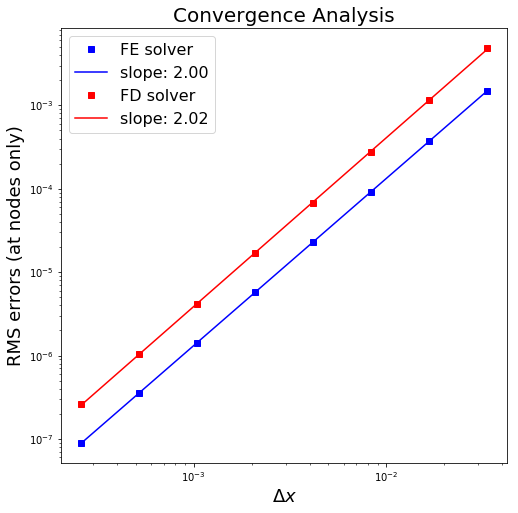

In [39]:
# plot figure

fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta x$', fontsize = 18)
ax1.set_ylabel('RMS errors (at nodes only)', fontsize = 18)
ax1.set_title('Convergence Analysis', fontsize = 20)

# finite element error
ax1.loglog(dx_all, err_all, 'bs', label = 'FE solver')
fit = np.polyfit(np.log(dx_all), np.log(err_all), 1)
ax1.loglog(dx_all, np.exp(fit[1]) * dx_all**(fit[0]), 'b-', label = 'slope: {:.2f}'.format(fit[0]))

# finite difference error
ax1.loglog(dx_all_FD, err_all_FD, 'rs', label = 'FD solver')
fit = np.polyfit(np.log(dx_all_FD), np.log(err_all_FD), 1)
ax1.loglog(dx_all_FD, np.exp(fit[1]) * dx_all_FD**(fit[0]), 'r-', label = 'slope: {:.2f}'.format(fit[0]))

ax1.legend(loc = 'best', fontsize = 16)
plt.show()

## Comments on the figure

The second order accuracy of the finite difference solver is expected, it is indeed based on a central difference scheme.<br>
The finite element solver offers a more accurate solution respect to the one obtained with the finite difference solver.

# Coursework 3B - Time-dependent advection-diffusion with the FEM

We want to develop a finite element solver for the time-dependent advection-diffusion problem, considering homogeneous Neumann boundary conditions on both sides. Given the choice of boundary conditions, we do not need to add any boundary term on the RHS of the solution equation (as done above in case of inhomogeneous Dirichlet boundary condition). Respect to the previous solver we need to add the discretisation matrix for the $u$ term (mass matrix) and we need to define a time-stepping method to discretise the time derivative. The mass matrix is obtained as described in Lecture 11. The implementation of the time-stepping method is described below when dealing with convergence.

## Define the analytical solution

In [12]:
def u_exact(U, kappa, x0, x, t):
    """
    Analtical solution of the advection-diffusion problem.
    Assumes a Dirac-delta function as initial condition(t=0).
    
    Parameters
    ----------
    U : float
        Speed of advection.
    kappa : float
        Diffusivity.
    x0 : float
        Starting point (in space) of the solution.
    x : numpy vector
        Positions of the space nodes.
    t : float
        Time at which the solution is evaluated.
    
    Returns
    -------
    Function defining the analytical solution at time t and space given by
    the x vector.
    """
    
    return np.exp( -((x-x0) - U*t)**2 / (4.*kappa*t)) / np.sqrt(4. * np.pi * kappa * t)


## Implement function to get the mass matrix

In [13]:
def mass_matrix(x):
    """
    Get the discretisation matrix.
    
    Parameters
    x : array
        Space mesh.
    
    Returns
    M : 2D array
        Discretisation matrix
    """
    dx = np.diff(x)
    M = np.zeros((len(x), len(x)))
    M[1:-1,1:-1] = np.diag(dx[:-1]/3  +  dx[1:]/3 , k=0) 
    M += np.diag(dx/6   , k=-1) + np.diag(dx/6   , k=1)
    M[0,0] = dx[0]/3
    M[-1,-1] = dx[-1]/3
    
    return M

## Implement the solver

In [14]:
def SolverFEM(num_ele_vec, dt_vec, theta, x0, t_start, t_end):
    """
    Finite element method solver for the time-dependent advection diffusion problem with 
    homogeneous Neumann boundary conditions.
    It can loop over more than one value for the number of elements and the time-step size,
    and it computes the error repect to the analytical solution. It can therefore be directly
    used also for the convergence analysis.
    In case num_ele_vec and/or dt_vec have more than one element, the returned x_nodes and u
    refer to the last couple of values (number of elements and time-step size) used.
    
    Parameters
    ----------
    num_ele_vec : array
        Number of elements involved in the discretisation.
        It can be one element vector or multpiple elements vector. 
        In the second case the solver loops over all the values 
        in the vector.
    dt_vec : array
        Time step size. As for the number of elements, if the values
        in the vector are more than one, the solver loops over them all.
    theta : float
        Parameter defining the kind of time-stepping method used.
        0 --> Forward Euler
        1 --> Backward Euler
        .5 --> Crank-Nicolson
    x0 : float
        Starting point (in space) of the analytical solution.
    t_start : float
        Start time of the simulation.
    t_end : float
        End time of the simulation.
    
    Returns
    -------
    x_nodes : array
        Space coordinates of the nodes.
    u : array
        Problem solution in correspondence of x_nodes.
    dx_all : array
        All the space-step sizes used.
    dt_all : array
        All the time-step sizes used.
    err_all : array
        All the errors computed, defined as the RMS of the errors
        between numerical and analytical solution.
    """

    n_ite_spa = len(num_ele_vec)
    n_ite_tim = len(dt_vec)

    err_all = []
    dt_all = []
    dx_all = []

    for ite_spa in range(n_ite_spa):
        for ite_tim in range(n_ite_tim):
            
            dt = dt_vec[ite_tim]
    
            N_elements_CG = num_ele_vec[ite_spa]
            N_nodes_CG = N_elements_CG + 1
    
            x_nodes = np.linspace(0, L, N_nodes_CG)
            dx = np.diff(x_nodes)

            K = np.zeros((N_nodes_CG, N_nodes_CG))
            K_adv = np.zeros((N_nodes_CG, N_nodes_CG))
            RHS = np.zeros(N_nodes_CG)

            # define initial state
            u_0 = u_exact(U, kappa, x0, x_nodes, t_start)

            # build the mass matrix
            M = mass_matrix(x_nodes)

            # get discretisation second derivative
            K[1:-1, 1:-1] = np.diag(1./dx[:-1]  +  1./dx[1:], k=0) \
            - np.diag(1. / dx[1:-1]   , k=-1) \
            - np.diag(1. / dx[1:-1]   , k=1)
            # add in the extra top left entries
            K[0, 0] = 1. / dx[0]
            K[0, 1] = -1. / dx[0]
            K[1,0] = -1. / dx[0]
            # add in the extra bottom right entries
            K[-1,-1] = 1. / dx[-1]
            K[-1,-2] = -1. / dx[-1]
            K[-2,-1] = -1. / dx[-1]

            # get discretisation first derivative
            K_adv[1:-1, 1:-1] = np.diag( (x_nodes[1:-1]**2/2. - x_nodes[1:-1]*x_nodes[0:-2] + x_nodes[0:-2]**2/2.) / dx[0:-1]**2 \
            + (-x_nodes[2:]**2/2. + x_nodes[1:-1]*x_nodes[2:] - x_nodes[1:-1]**2/2.) / dx[1:]**2 , k=0) \
            + np.diag( (x_nodes[2:-1]**2/2. - x_nodes[2:-1]*x_nodes[1:-2] + x_nodes[1:-2]**2/2.) / dx[1:-1]**2 , k=-1) \
            + np.diag( (-x_nodes[2:-1]**2/2. + x_nodes[2:-1]*x_nodes[1:-2] - x_nodes[1:-2]**2/2.) / dx[1:-1]**2 , k= 1)
            # add in the extra top left entries
            K_adv[0, 0] = (-x_nodes[1]**2/2. + x_nodes[1]*x_nodes[0] - x_nodes[0]**2/2.) / dx[0]**2
            K_adv[0, 1] = (-x_nodes[1]**2/2. + x_nodes[1]*x_nodes[0] - x_nodes[0]**2/2.) / dx[0]**2
            K_adv[1,0] = -(-x_nodes[1]**2/2. + x_nodes[1]*x_nodes[0] - x_nodes[0]**2/2.) / dx[0]**2
            # add in the extra bottom right entries
            K_adv[-1,-1] = (x_nodes[-1]**2/2. - x_nodes[-1]*x_nodes[-2] + x_nodes[-2]**2/2.) / dx[-1]**2
            K_adv[-1,-2] = (x_nodes[-1]**2/2. - x_nodes[-1]*x_nodes[-2] + x_nodes[-2]**2/2.) / dx[-1]**2
            K_adv[-2,-1] = (-x_nodes[-2]**2/2. + x_nodes[-1]*x_nodes[-2] - x_nodes[-2]**2/2.) / dx[-1]**2

            # set up the problem
            D = kappa*K-U*K_adv
            A = M + dt*theta*(D)
            RHS_matrix = M - dt*(1-theta)*(D)

            # time iterations
            u_prv = np.copy(u_0)
            t = t_start
            while t <= t_end:
                b = RHS_matrix @ u_prv.T
                u = sl.solve(A, b)
                u_prv = np.copy(u)
                t += dt

            u_exa = u_exact(U, kappa, x0, x_nodes, t_end)

            err = sl.norm(u - u_exa) / np.sqrt(len(u))
            err_all.append(err)
    
            dt_all.append(dt)
            dx_all.append(dx[0])
            
    return x_nodes, u, dx_all, dt_all, err_all


## Test the solver

In [15]:
# set parameters
U = 1.
L = 3.
kappa = 0.01
Pe = U*L / kappa  # recall that Pe = (U*L)/k
x0 = 0.5
t_start = 0.05
t_end = t_start + 1.
theta = 0
num_ele_vec = np.array([86])
dt_vec = np.array([0.00005])

x_nodes, u, dx_all, dt_all, err_all = SolverFEM(num_ele_vec, dt_vec, theta, x0, t_start, t_end)
print('r parameter: ', kappa*dt_all[0]/(np.min(dx_all[0])**2), '\n')

r parameter:  0.0004108888888888889 



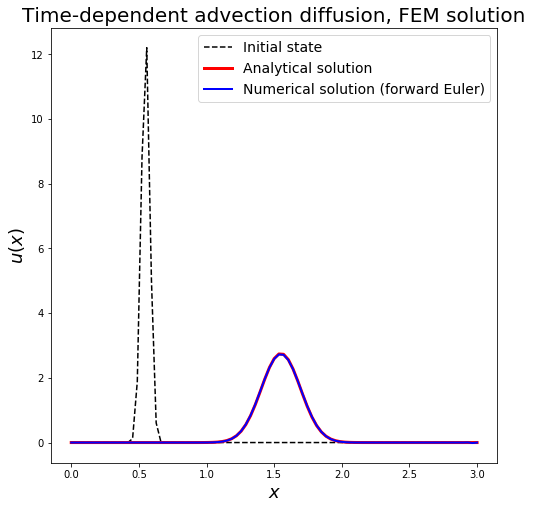

In [16]:
# plot
fig = plt.figure(figsize = (8, 8))
ax1 = plt.subplot(111)

ax1.set_title('Time-dependent advection diffusion, FEM solution', fontsize = 20)
ax1.set_xlabel('$x$', fontsize = 18)
ax1.set_ylabel('$u(x)$', fontsize = 18)

u_0 = u_exact(U, kappa, x0, x_nodes, t_start)
ax1.plot(x_nodes, u_0, 'k--', label = 'Initial state')

u_exa = u_exact(U, kappa, x0, x_nodes, t_end)
ax1.plot(x_nodes, u_exa, 'r', label = 'Analytical solution', linewidth = 3)

ax1.plot(x_nodes, u, 'b', label = 'Numerical solution (forward Euler)', linewidth = 2)

ax1.legend(loc = 'best', fontsize = 14)
plt.show()

## Convergence analysis

We now investigate the convergence and order of accuracy of the method. For the time-stepping, we consider three schemes, i) forward Euler, ii) backward Euler, iii) Crank-Nicolson method. The schemes can be defined by the general formula:

<br>
$$ \frac{\boldsymbol{u}^{n+1} - \boldsymbol{u}^{n}}{\Delta t} = A \, (\theta \, \boldsymbol{u}^{n+1} + (1-\theta) \, \boldsymbol{u}^{n}), $$
<br>

we obtain forward Euler, backward Euler and Crank-Nicolson by setting $\theta$ equals to 0, 1 and 1/2, respectively.<br>
The numerical solutions are obtained integrating the problem for a total time period of 0.5 intead of 1 as done above. This is because we found it difficult to obtain a stable solution integrating for a total time of 1 and varying either only $\Delta x$ or only $\Delta t$.

## Forward Euler

In [17]:
# convergence in space

# set parameters

U = 1.
L = 3.
kappa = 0.01
Pe = U*L / kappa  # recall that Pe = (U*L)/k

x0 = 0.5

t_start = 0.05
t_end = t_start + 0.5

theta = 0

num_ele_vec = np.array([60, 120, 240])
dt_vec = np.array([0.000025])

x_nodes, u, dx_all_s, dt_all_s, err_all_s = SolverFEM(num_ele_vec, dt_vec, theta, x0, t_start, t_end)


# convergence in time

# set parameters

num_ele_vec = np.array([62])
dt_vec = np.array([0.0017, 0.0017/2])


x_nodes, u, dx_all_t, dt_all_t, err_all_t = SolverFEM(num_ele_vec, dt_vec, theta, x0, t_start, t_end)

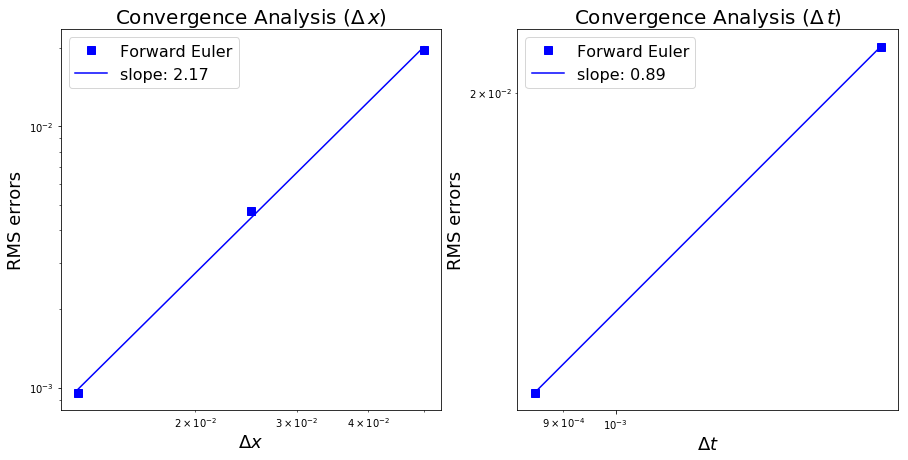

In [18]:
# plot 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7))

ax1.set_title("Convergence Analysis ($\Delta \, x$)", fontsize = 20)
ax1.set_xlabel("$\Delta x$", fontsize = 18)
ax1.set_ylabel('RMS errors', fontsize = 18)
ax1.loglog(dx_all_s, err_all_s, 'bs', label = 'Forward Euler', markersize = 8)
fit = np.polyfit(np.log(dx_all_s), np.log(err_all_s), 1)
ax1.loglog(dx_all_s, np.exp(fit[1]) * dx_all_s**(fit[0]), 'b-', label = 'slope: {:.2f}'.format(fit[0]))
ax1.legend(loc = 'best', fontsize = 16)

ax2.set_title("Convergence Analysis ($\Delta \, t$)", fontsize = 20)
ax2.set_xlabel("$\Delta t$", fontsize = 18)
ax2.set_ylabel('RMS errors', fontsize = 18)
ax2.loglog(dt_all_t, err_all_t, 'bs', label = 'Forward Euler', markersize = 8)
fit = np.polyfit(np.log(dt_all_t), np.log(err_all_t), 1)
ax2.loglog(dt_all_t, np.exp(fit[1]) * dt_all_t**(fit[0]), 'b-', label = 'slope: {:.2f}'.format(fit[0]))
ax2.legend(loc = 'best', fontsize = 16)

plt.show()

## Comments on the figure

As expected, we obtain second order accuracy in space and first order accuracy in time. The forward Euler method is indeed first order accurate.

## Backward Euler

In [19]:
# convergence in space

# set parameters

U = 1.
L = 3.
kappa = 0.01
Pe = U*L / kappa  # recall that Pe = (U*L)/k

x0 = .5

t_start = 0.05
t_end = t_start + .5

theta = 1

num_ele_vec = np.array([60, 120, 240])
dt_vec = np.array([1.25e-5])


# get solutions and errors
x_nodes, u, dx_all_s, dt_all_s, err_all_s = SolverFEM(num_ele_vec, dt_vec, theta, x0, t_start, t_end)


# convergence in time

# set parameters

num_ele_vec = np.array([600])
dt_vec = np.array([0.005/4, 0.005/2, 0.005])


x_nodes, u, dx_all_t, dt_all_t, err_all_t = SolverFEM(num_ele_vec, dt_vec, theta, x0, t_start, t_end)

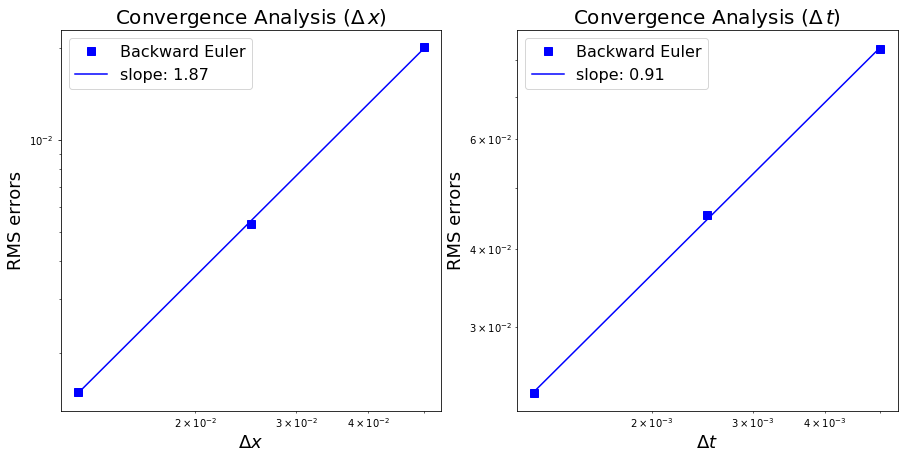

In [20]:
# plot 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7))

ax1.set_title("Convergence Analysis ($\Delta \, x$)", fontsize = 20)
ax1.set_xlabel("$\Delta x$", fontsize = 18)
ax1.set_ylabel('RMS errors', fontsize = 18)
ax1.loglog(dx_all_s, err_all_s, 'bs', label = 'Backward Euler', markersize = 8)
fit = np.polyfit(np.log(dx_all_s), np.log(err_all_s), 1)
ax1.loglog(dx_all_s, np.exp(fit[1]) * dx_all_s**(fit[0]), 'b-', label = 'slope: {:.2f}'.format(fit[0]))
ax1.legend(loc = 'best', fontsize = 16)

ax2.set_title("Convergence Analysis ($\Delta \, t$)", fontsize = 20)
ax2.set_xlabel("$\Delta t$", fontsize = 18)
ax2.set_ylabel('RMS errors', fontsize = 18)
ax2.loglog(dt_all_t, err_all_t, 'bs', label = 'Backward Euler', markersize = 8)
fit = np.polyfit(np.log(dt_all_t), np.log(err_all_t), 1)
ax2.loglog(dt_all_t, np.exp(fit[1]) * dt_all_t**(fit[0]), 'b-', label = 'slope: {:.2f}'.format(fit[0]))
ax2.legend(loc = 'best', fontsize = 16)

plt.show()

## Comments on the figure

The two plots show the expected order of convergence, second order in space, related to the FEM discretisation, and first order in time, linked to the accuracy achieved with the backward Euler scheme.

## Crank-Nicolson

In [21]:
# convergence in space

# set parameters

U = 1.
L = 3.
kappa = 0.01
Pe = U*L / kappa  # recall that Pe = (U*L)/k

x0 = .5

t_start = 0.05
t_end = t_start + .5

theta = .5

num_ele_vec = np.array([60, 120, 240])
dt_vec = np.array([1.25e-5])


# get solutions and errors
x_nodes, u, dx_all_s, dt_all_s, err_all_s = SolverFEM(num_ele_vec, dt_vec, theta, x0, t_start, t_end)


# convergence in time

# set parameters

num_ele_vec = np.array([600])
dt_vec = np.array([0.005*2, 0.005*4, 0.005*8])


# get solutions and errors
x_nodes, u, dx_all_t, dt_all_t, err_all_t = SolverFEM(num_ele_vec, dt_vec, theta, x0, t_start, t_end)

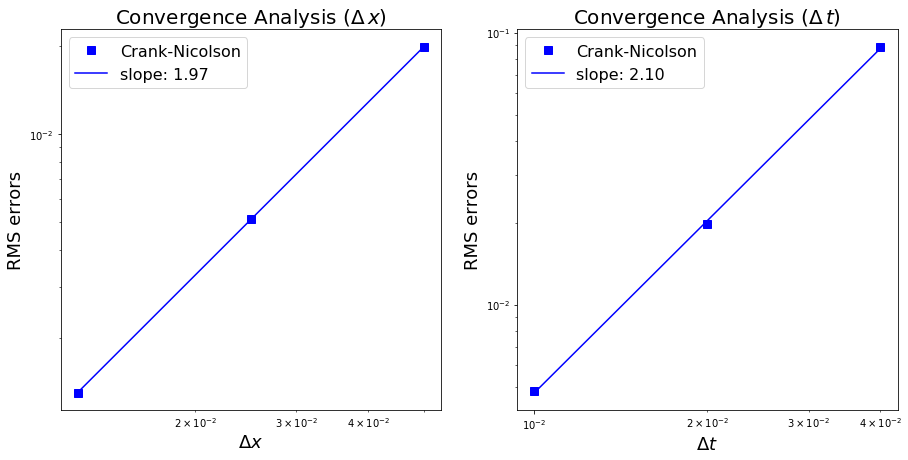

In [22]:
# plot 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7))

ax1.set_title("Convergence Analysis ($\Delta \, x$)", fontsize = 20)
ax1.set_xlabel("$\Delta x$", fontsize = 18)
ax1.set_ylabel('RMS errors', fontsize = 18)
ax1.loglog(dx_all_s, err_all_s, 'bs', label = 'Crank-Nicolson', markersize = 8)
fit = np.polyfit(np.log(dx_all_s), np.log(err_all_s), 1)
ax1.loglog(dx_all_s, np.exp(fit[1]) * dx_all_s**(fit[0]), 'b-', label = 'slope: {:.2f}'.format(fit[0]))
ax1.legend(loc = 'best', fontsize = 16)

ax2.set_title("Convergence Analysis ($\Delta \, t$)", fontsize = 20)
ax2.set_xlabel("$\Delta t$", fontsize = 18)
ax2.set_ylabel('RMS errors', fontsize = 18)
ax2.loglog(dt_all_t, err_all_t, 'bs', label = 'Crank-Nicolson', markersize = 8)
fit = np.polyfit(np.log(dt_all_t), np.log(err_all_t), 1)
ax2.loglog(dt_all_t, np.exp(fit[1]) * dt_all_t**(fit[0]), 'b-', label = 'slope: {:.2f}'.format(fit[0]))
ax2.legend(loc = 'best', fontsize = 16)

plt.show()

## Comments on the figure

In this case we obtain, as expected, second order accuracy both varying the $\Delta x$ and the $\Delta t$. This is because the Crank-Nicolson method is second order accurate.